In [1]:
import os
os.chdir('D:\\Data Science\\Dataset')

In [2]:
import numpy as np
import pandas as pd

In [3]:
pvmt = pd.read_csv('D:\Data Science\Dataset\Cradit_card\payment_data.csv')

In [4]:
cust = pd.read_csv('D:\Data Science\Dataset\Cradit_card\customer_data.csv')

In [5]:
pvmt.head(4)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016


In [6]:
cust.head(4)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000


In [7]:
cust.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [8]:
cust['fea_2']=cust['fea_2'].fillna(cust['fea_2'].mean())


In [9]:
cust.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [10]:
check_2 =cust['label'].value_counts()
check_2

0    900
1    225
Name: label, dtype: int64

C:\Users\91808\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


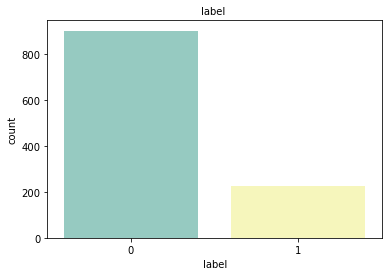

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(cust["label"], palette="Set3")
plt.title("label ",fontsize=10)
plt.show()

In [14]:
not_risk = cust['label'] == 0
risk = cust['label']==1

In [15]:
nr = not_risk.sum()

In [16]:
r = risk.sum()

###  *imbalamced dataset*  handle imbalnced data 

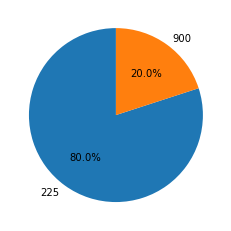

In [17]:
import matplotlib.pyplot as plt
labels = r, nr
plt.pie(check_2,autopct='%1.1f%%', startangle=90,labels = labels );

In [18]:
#from imblearn.over_sampling import RandomOverSampler
x = cust.drop(['label'], axis = 1)
y = cust.loc[:,'label'].values

In [19]:
!pip install imblearn

In [20]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

In [21]:
sm = SMOTE(random_state =43)
x, y = sm.fit_resample(x, y)

C:\Users\91808\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


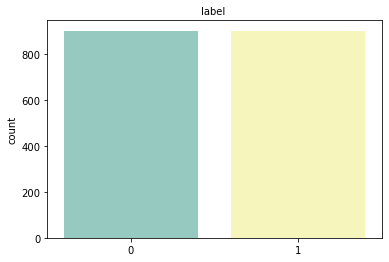

In [22]:
sns.countplot(y, palette='Set3')
plt.title("label ",fontsize=10)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train,Y_train)
brf.score(X_train,Y_train)

1.0

In [24]:
brf.score(X_test,Y_test)

0.8351851851851851

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [27]:
#random forestclassifier
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(n_estimators = 10000)
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.842


In [28]:
t_score = r_forest.score(x_train,y_train)
t_score

1.0

In [29]:
from sklearn.svm import SVC
svc = SVC(C=4 ,kernel ='rbf', gamma = 'auto')

In [30]:
svc.fit(x_train,y_train)
predicted = svc.predict(x_test)
score = svc.score(x_test, y_test)
svc_score_ = np.mean(score)
print('Accuracy :%.3f' % (svc_score_))

Accuracy :0.753


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       294
           1       0.73      0.81      0.77       300

    accuracy                           0.75       594
   macro avg       0.76      0.75      0.75       594
weighted avg       0.76      0.75      0.75       594



### Accurcy  ko increase krne k liye K-Fold Cross Validation

In [32]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
model = RandomForestClassifier()
K_fold = KFold(10)

In [42]:
clf = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, x, y, cv=5)
print(scores)

[0.53888889 0.57222222 0.61388889 0.60277778 0.64722222]


In [35]:
from sklearn.model_selection import cross_val_score
check4 = cross_val_score(model,x,y, cv= K_fold)

In [36]:
print(check4)


[0.74444444 0.77222222 0.80555556 0.78333333 0.81666667 0.80555556
 0.92777778 0.96111111 0.95       0.97222222]


In [37]:
print(np.mean(check4))

0.8538888888888889


In [38]:
model2 =SVC(C=4 ,kernel ='rbf', gamma = 'auto')
check5 = cross_val_score(model2,x,y, cv = K_fold)
print(check5)

[0.68888889 0.63888889 0.71666667 0.72222222 0.68333333 0.75555556
 0.87222222 0.85555556 0.83888889 0.83888889]


In [39]:
print(np.mean(check5))

0.7611111111111111
